# **Business Understanding**
SyriaTel, a leading telecommunications company, faces a significant challenge in retaining its customer base. Customer churn, or the loss of customers to competitors, can have a substantial impact on the company's revenue and profitability. Acquiring new customers is generally more expensive than retaining existing ones, making customer retention a critical aspect of SyriaTel's business strategy.

In the highly competitive telecommunications market, customers have numerous options and can easily switch to other service providers if they are dissatisfied with the quality of service, pricing, or other factors. Identifying customers at risk of churning and taking proactive measures to address their concerns can significantly improve customer loyalty and reduce the potential revenue loss associated with churn.

**Main Objective**

To develop a binary classification model that can accurately predict whether a customer will stop doing business with SyriaTel in the near future.

# **Data Understanding**

**Data Source**

The dataset was obtained from Kaggle and is available at: 
https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

**Data Description**

The dataset contains 3333 rows and 21 columns. Each row represents a unique customer, and the columns provide various attributes related to the customer's account details, usage patterns, and churn status. The dataset consists of the following columns:

**1. state:** The state where the customer resides.

**2. account_length:** The number of months the customer has been with the company.

**3. area_code:** The area code of the customer's phone number.

**4. phone_number:** The customer's phone number.

**5. international_plan:** Indicates whether the customer has an international calling plan (Yes or No).

**6. voice_mail_plan:** Indicates whether the customer has a voice mail plan (Yes or No).

**7. number_vmail_messages:** The number of voice mail messages the customer has received.

**8. total_day_minutes:** The total number of minutes the customer has spent on calls during the day.

**9. total_day_calls:** The total number of calls the customer has made during the day.

**10. total_day_charge:** The total charge for the customer's day calls.

**11. total_eve_minutes:** The total number of minutes the customer has spent on calls during the evening.

**12. total_eve_calls:** The total number of calls the customer has made during the evening.

**13. total_eve_charge:** The total charge for the customer's evening calls.

**14. total_night_minutes:** The total number of minutes the customer has spent on calls during the night.

**15. total_night_calls:** The total number of calls the customer has made during the night.

**16. total_night_charge:** The total charge for the customer's night calls.

**17. total_intl_minutes:** The total number of minutes the customer has spent on international calls.

**18. total_intl_calls:** The total number of international calls the customer has made.

**19. total_intl_charge:** The total charge for the customer's international calls.

**20. customer_service_calls:** The number of customer service calls the customer has made.

**21. churn:** Indicates whether the customer has churned (TRUE or FALSE ).







# **Data Preparation**

**Importing the Relevant Libraries**

In [1]:
# numpy for high-level mathematical functions on arrays
import numpy as np
# pandas for tablular data analysis and manipulation
import pandas as pd
# seaborn and matplotlib for data visualization
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
import warnings
warnings.filterwarnings('ignore')

#sklearn preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder,  OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report


# sklearn classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn evaluation metrics and validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


**Loading the Dataset**

In [2]:
# Load the entire Excel file
df = pd.read_excel('Dataset.xlsx')

# Print the loaded data
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**Checking for Missing Values**

In [5]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

**Checking for Duplicates**

In [6]:
# Check for duplicates in the entire DataFrame
duplicates = df[df.duplicated()]

# Print summary report
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
    print("\nTotal number of duplicate rows:", len(duplicates))
else:
    print("No duplicate rows found.")


No duplicate rows found.


# **Exploratory Data Analysis**

### **Univariate Analysis**

**Target**

Distribution of Target Variable:


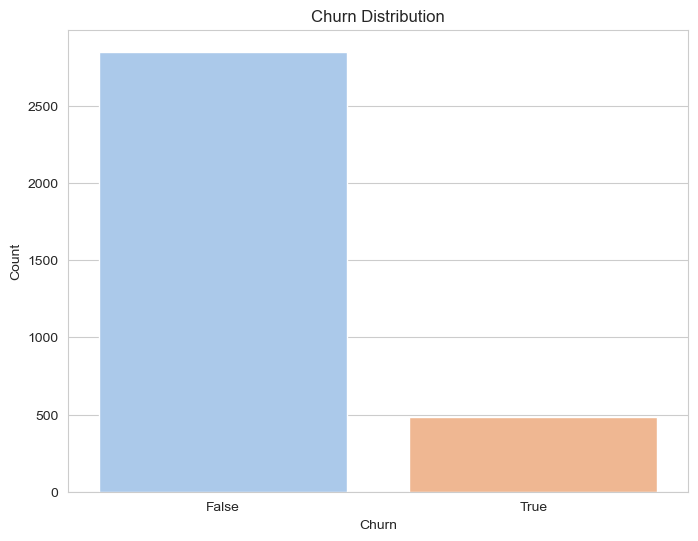

In [11]:
print('Distribution of Target Variable:')

# Set the custom color palette
sns.set_palette('pastel')

# Creating a figure object
plt.figure(figsize=(8, 6))

# Plotting the churn distribution
sns.countplot(data=df, x='churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

# Show plot
plt.show()


**Numerical**

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


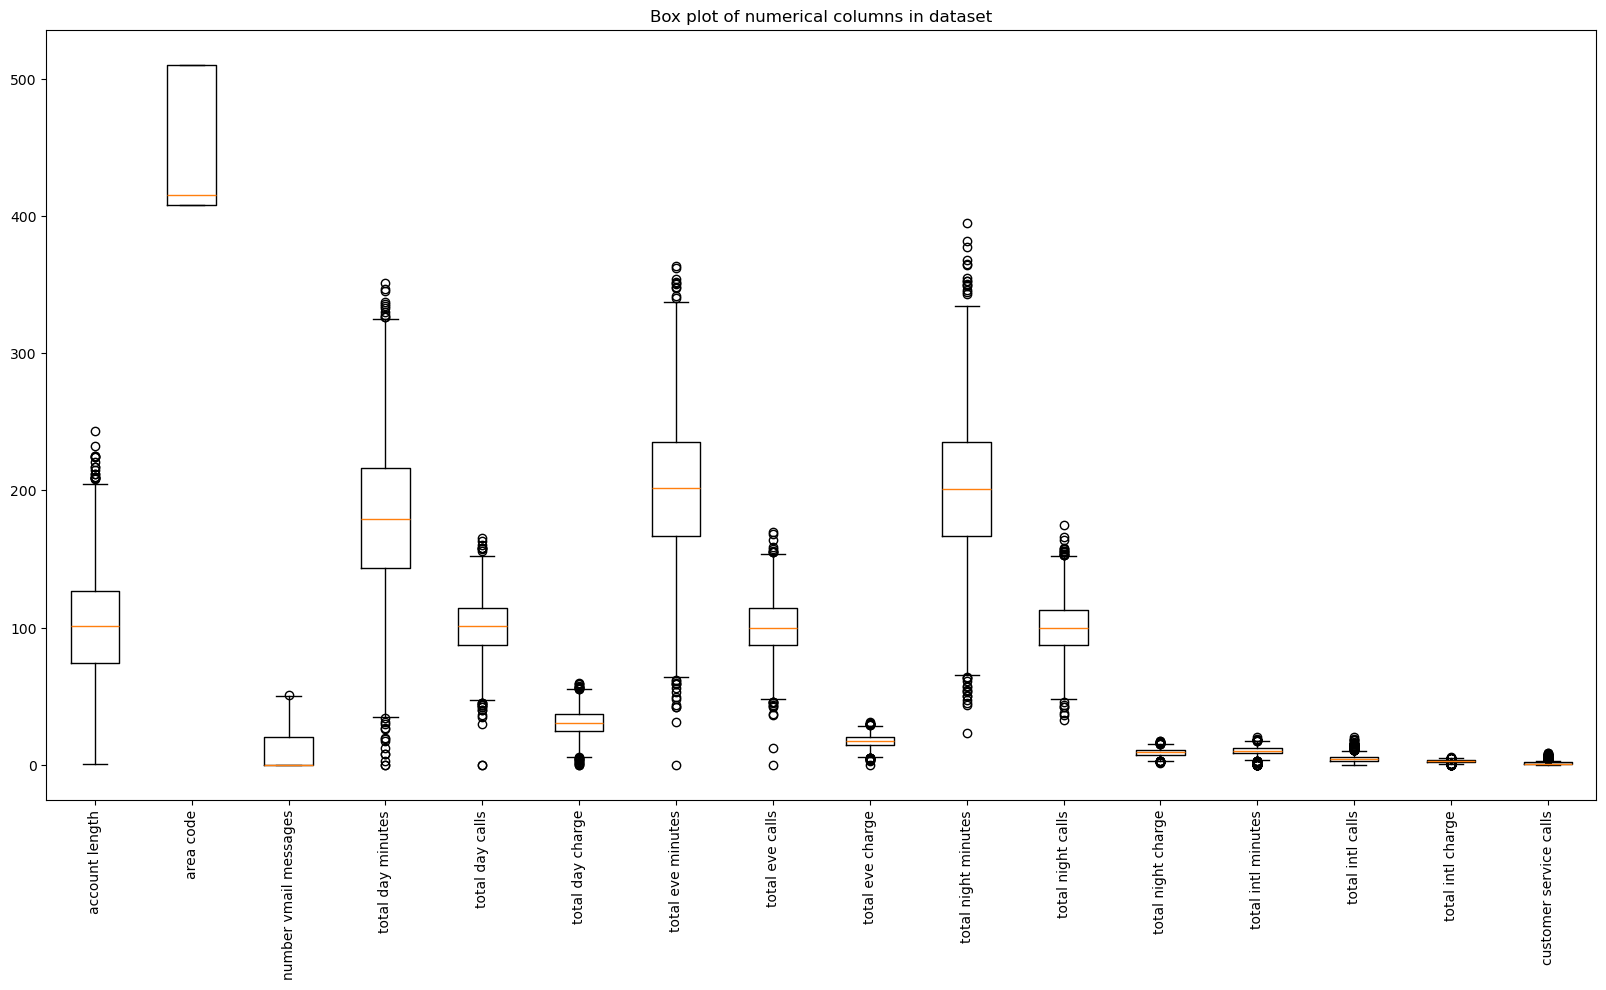

In [8]:
# Explore the dataset
display(df.describe())

# Create a box plot for numerical columns
plt.figure(figsize=(20, 10))
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.boxplot([df[col] for col in numerical_cols])
plt.title("Box plot of numerical columns in dataset")
plt.xticks(range(1, len(numerical_cols) + 1), numerical_cols, rotation=90)
plt.show()

**Interpretetion:**

**a). Table: Key Statistics:**

1. **account length**: The average account length is around 101 months, with a standard deviation of about 40 months. The minimum account length is 1 month, and the maximum is 243 months (over 20 years).

2. **area code**: Categorical column, with values ranging from 408 to 510.

3. **number vmail messages**: The average number of voice mail messages is around 8, with a standard deviation of 13.7. Many customers have 0 voice mail messages (25th percentile), while some have up to 51 messages (max).

4. **total day/eve/night/intl minutes**: The average total day minutes is around 180, with a maximum of 350.8 minutes. Evening and night minutes have similar averages, around 200 minutes. International minutes have a lower average of around 10 minutes.

5. **total day/eve/night/intl calls**: The averages range from around 100 to 120 calls, with maximums ranging from 165 to 175 calls.

6. **total day/eve/night/intl charge**: The average charges are generally low, with total day charge averaging around $30.50 and total night charge averaging around $9.05. However, there are some higher maximum charges, such as $59.64 for total day charge and $17.77 for total night charge.

7. **customer service calls**: The average number of customer service calls is around 2.8, with a maximum of 9 calls.

The presence of minimum values of 0 for various columns suggests that some customers may not have used certain services or made calls during specific time periods.


**b). Box Plot: Key Observations:**

1. Outliers: Several columns, such as "account length," "number vmail messages," "total day minutes," and "total eve minutes," have outliers represented by individual dots above or below the whiskers.

2. Skewed distributions: Some columns, like "total day charge," "total eve charge," "total night charge," and "total intl charge," have skewed distributions, with the median closer to the lower quartile. This suggests that most values in these columns are relatively small, with a few larger values.

3. Spread of the distributions: The height of the boxes and the length of the whiskers indicate the spread or variability of the data in each column. For example, "total night minutes" and "total intl minutes" have relatively compact distributions, while "total day minutes" and "total eve minutes" have wider distributions.

4. Potential issues: The presence of outliers and skewed distributions in some columns may indicate the need for data cleaning, transformation, or handling of these exceptional values during data preprocessing or modeling.

5. Comparison across columns: By comparing the box plots side by side, you can observe the relative scales and distributions of different numerical features. For instance, the "total night charge" column has a smaller range of values compared to "total day charge" and "total eve charge."

### **Bivariate Analysis**

**a). Churn By Plan**

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

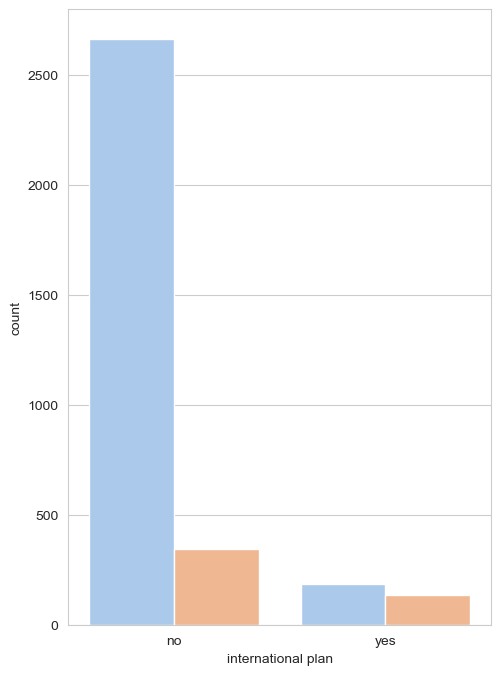

In [12]:
# Set style for plots
sns.set_style("whitegrid")

# Set the custom color palette
#sns.set_palette('pastel')

# Set up subplots
plt.figure(figsize=(12, 8))

# International Plan vs. Churn
plt.subplot(1, 2, 1)
sns.countplot(x='international plan', hue='churn', data=df, palette="pastel")
plt.title('Churn by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')

# Voice Mail Plan vs. Churn
plt.subplot(1, 2, 2)
sns.countplot(x='voice mail plan', hue='churn', data=df, palette="pastel")
plt.title('Churn by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

plt.show()


AttributeError: 'numpy.bool_' object has no attribute 'startswith'

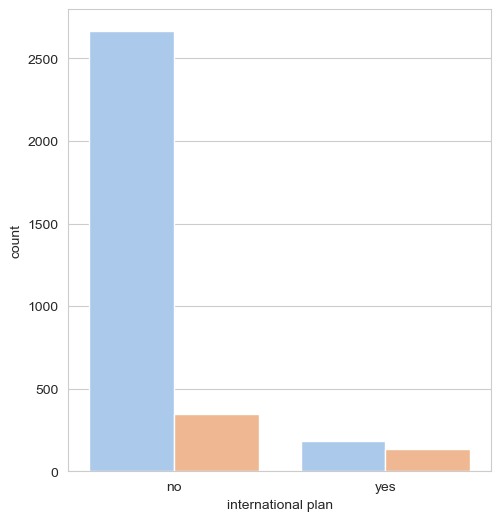

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

# Set the custom color palette
sns.set_palette('pastel')

# Set up subplots
plt.figure(figsize=(12, 6))

# International Plan vs. Churn
plt.subplot(1, 2, 1)
sns.countplot(x='international plan', hue='churn', data=df)
plt.title('Churn by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')

# Voice Mail Plan vs. Churn
plt.subplot(1, 2, 2)
sns.countplot(x='voice mail plan', hue='churn', data=df)
plt.title('Churn by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

plt.show()


**Churn by International Plan:**

**Key observations:**

1. The majority of customers did not have an international plan subscription.

2. Among customers without an international plan, a higher proportion churned compared to those with an international plan.

**Interpretetion**

Having an international plan may be associated with lower customer churn rates. Customers who do not have this plan are more likely to churn.

**Churn by Voice Mail Plan:**

**The key observations are:**

1. Most customers did have a voice mail plan subscription.

2. Among customers with a voice mail plan, a lower proportion churned compared to those without a voice mail plan.

**Interpretetion**

Having a voice mail plan is associated with lower customer churn rates. Customers without a voice mail plan are more likely to churn.

**Overall**

Certain additional services or plan features, such as international and voice mail plans, may contribute to customer retention and reduce the likelihood of churn. The telecom company could consider promoting or bundling these services as part of their customer retention strategies.

**b)Total Minutes Vs Churn**

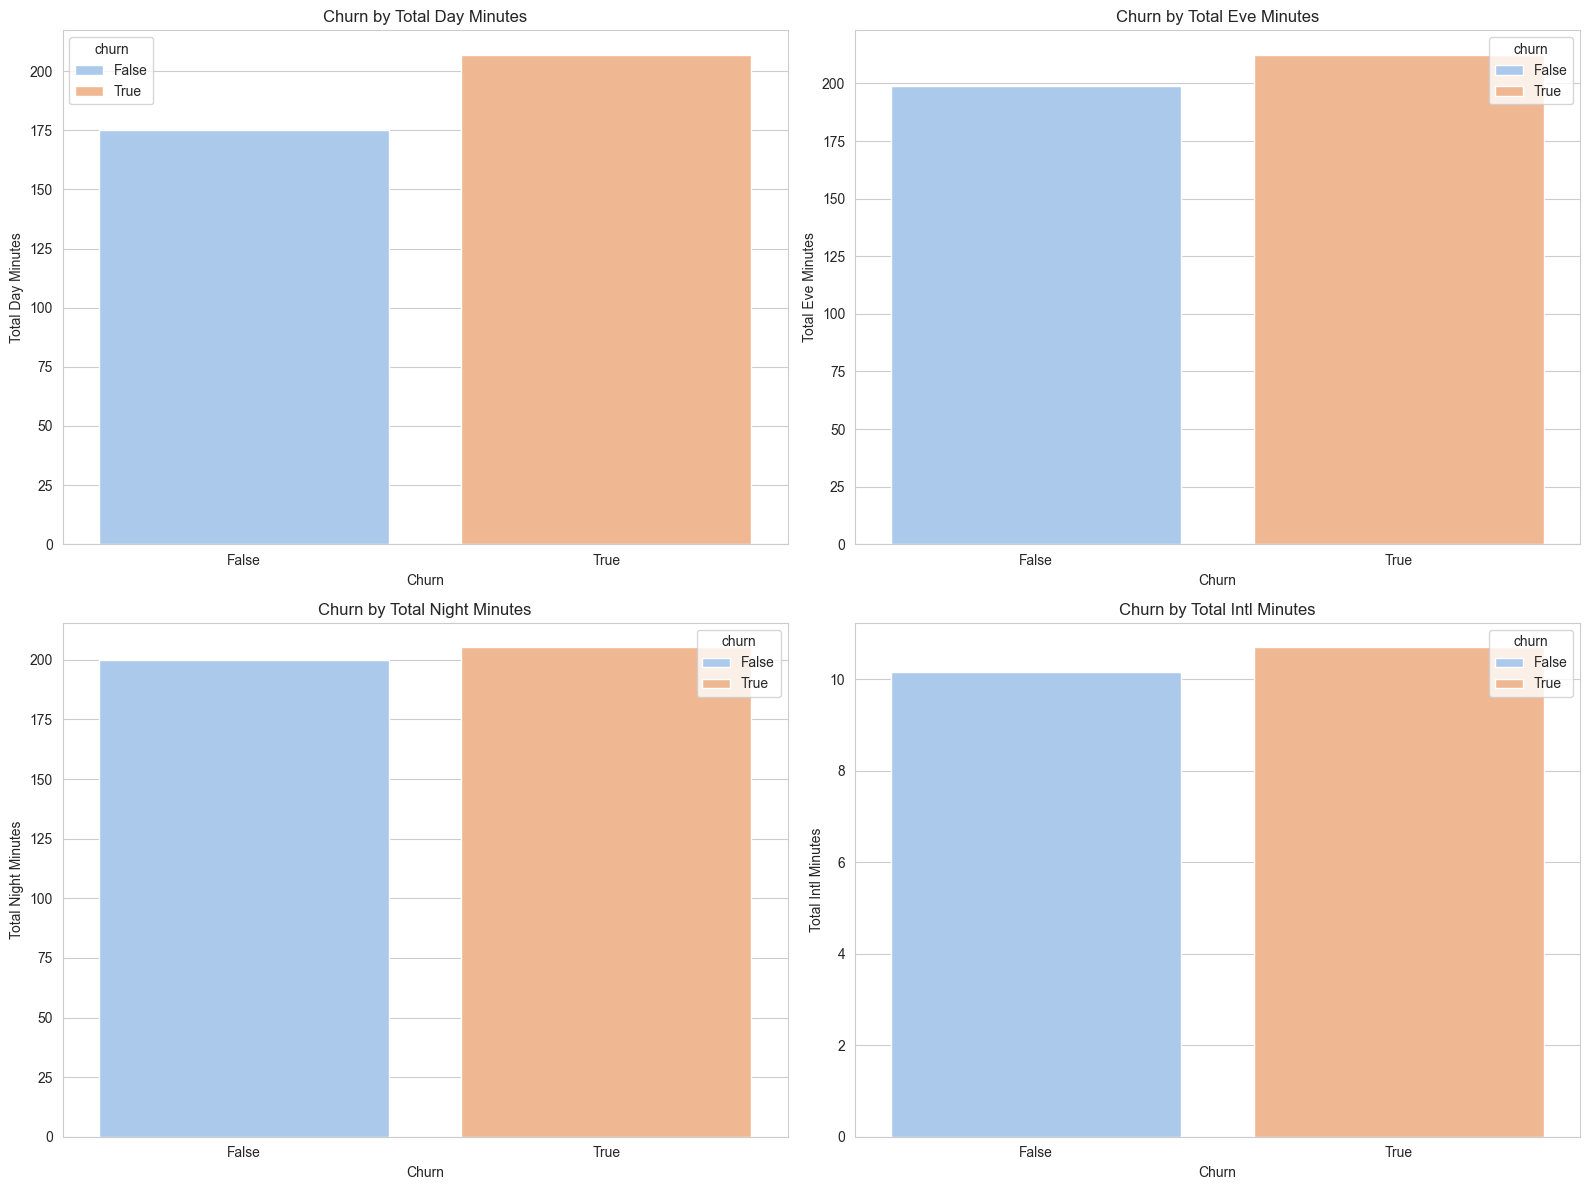

In [ ]:
# Set style for plots
sns.set_style("whitegrid")

# Set up subplots
plt.figure(figsize=(16, 12))

# Total Day Minutes vs. Churn
plt.subplot(2, 2, 1)
sns.barplot(x='churn', y='total day minutes', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Day Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')

# Total Eve Minutes vs. Churn
plt.subplot(2, 2, 2)
sns.barplot(x='churn', y='total eve minutes', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Eve Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Eve Minutes')

# Total Night Minutes vs. Churn
plt.subplot(2, 2, 3)
sns.barplot(x='churn', y='total night minutes', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Night Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Night Minutes')

# Total Intl Minutes vs. Churn
plt.subplot(2, 2, 4)
sns.barplot(x='churn', y='total intl minutes', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Intl Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Intl Minutes')

# Adjust layout
plt.tight_layout()

plt.show()


**Interpretention**

These subplots reveal a consistent trend: customers who churned tended to have higher total usage minutes across different time periods (day, evening, night, and international) compared to customers who did not churn.

This information could be valuable for the telecom company to identify potential churn risks based on customers' usage patterns. By addressing factors that lead to higher usage, offering more competitive plans, or providing usage monitoring and alerts, the company may be able to reduce customer churn and improve customer retention.

**c)Total Charge Vs Churn**

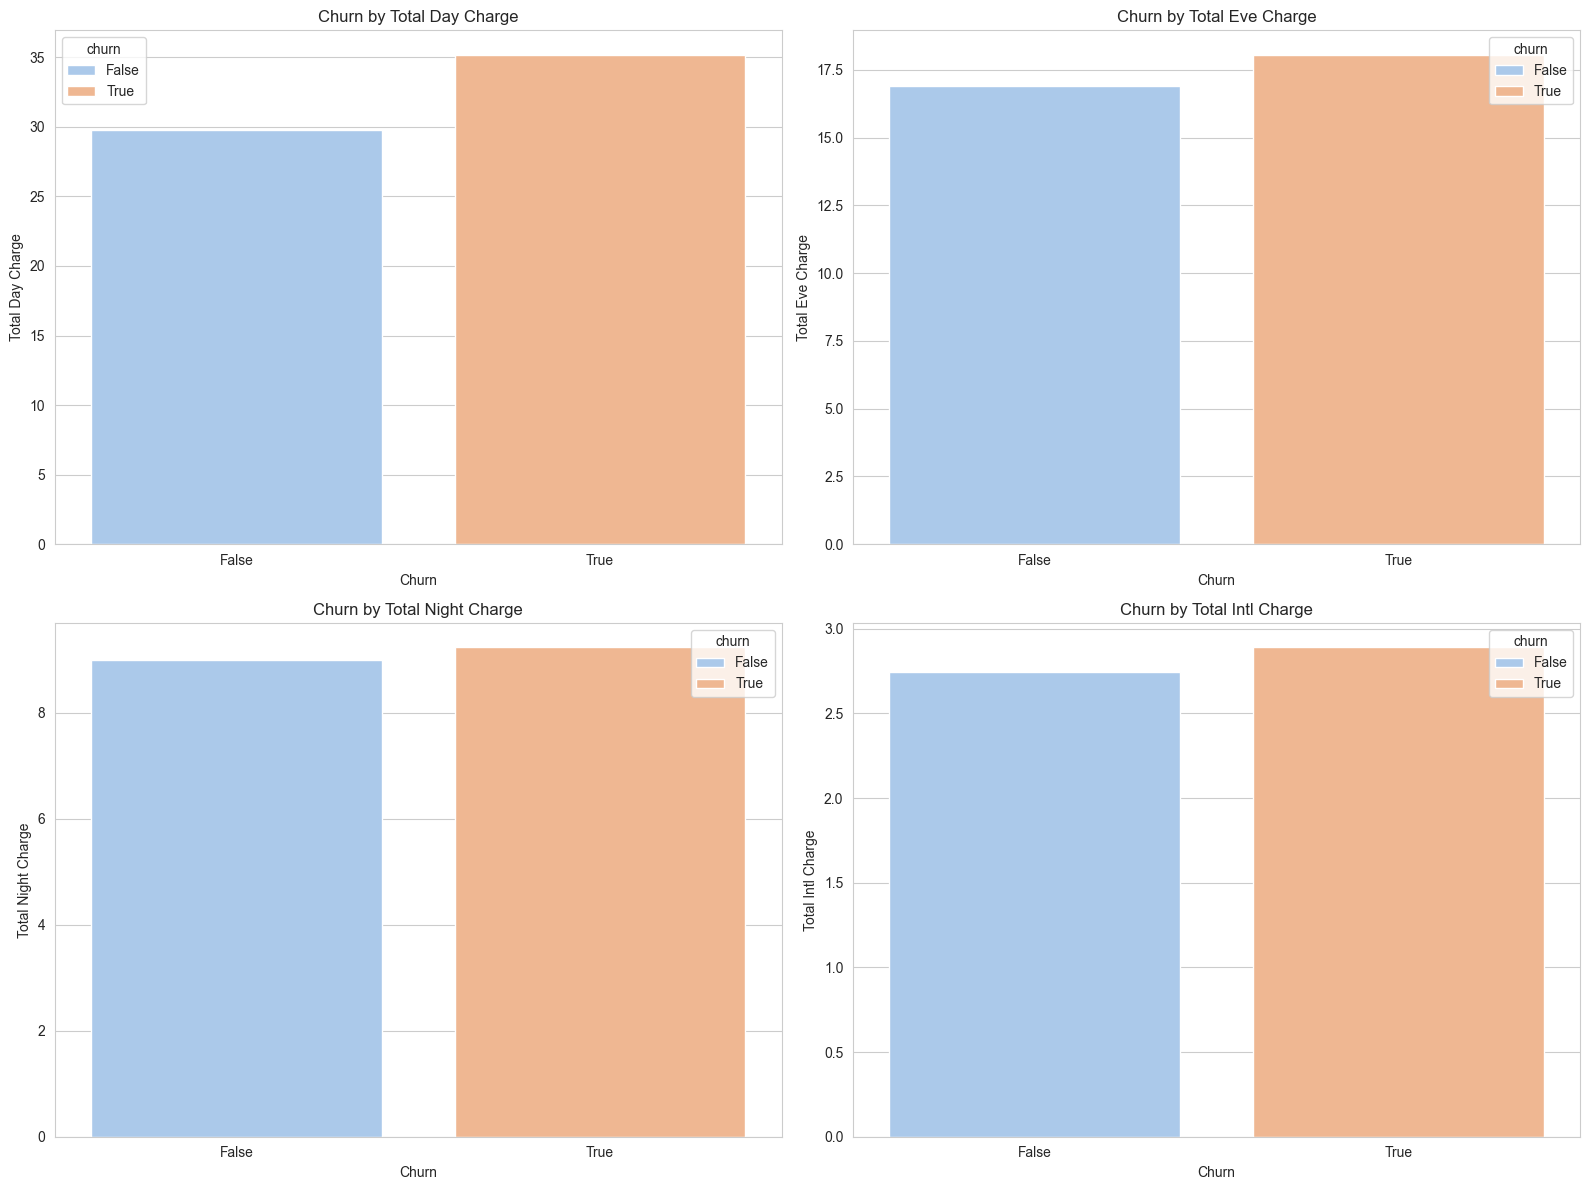

In [ ]:
# Set style for plots
sns.set_style("whitegrid")

# Set up subplots
plt.figure(figsize=(16, 12))

# Total Day Charge vs. Churn
plt.subplot(2, 2, 1)
sns.barplot(x='churn', y='total day charge', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Day Charge')
plt.xlabel('Churn')
plt.ylabel('Total Day Charge')

# Total Eve Charge vs. Churn
plt.subplot(2, 2, 2)
sns.barplot(x='churn', y='total eve charge', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Eve Charge')
plt.xlabel('Churn')
plt.ylabel('Total Eve Charge')

# Total Night Charge vs. Churn
plt.subplot(2, 2, 3)
sns.barplot(x='churn', y='total night charge', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Night Charge')
plt.xlabel('Churn')
plt.ylabel('Total Night Charge')

# Total Intl Charge vs. Churn
plt.subplot(2, 2, 4)
sns.barplot(x='churn', y='total intl charge', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Total Intl Charge')
plt.xlabel('Churn')
plt.ylabel('Total Intl Charge')

# Adjust layout
plt.tight_layout()

plt.show()


**Interpretetion**

These subplots reveal a consistent trend: customers who churned tended to have higher average charges across different periods (day, evening, night, and international calls) compared to customers who did not churn.

This information could be valuable for the telecom company to identify potential churn risks based on customers' usage patterns and charges. By addressing factors that lead to higher charges or offering more competitive pricing plans, the company may be able to reduce customer churn and improve customer retention.

**d)Customer Service Calls Vs Churn**

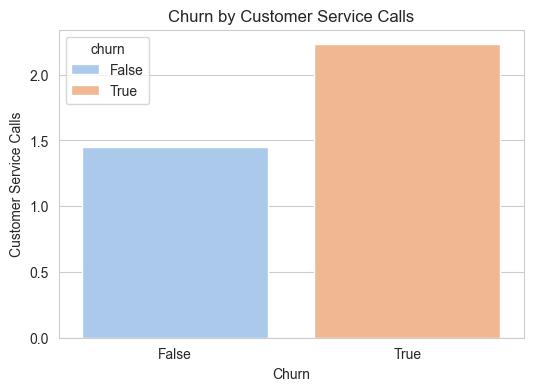

In [ ]:
#Customer Service Calls vs. Churn
plt.figure(figsize=(6, 4))
sns.barplot(x='churn', y='customer service calls', data=df, palette="pastel", hue='churn', errorbar=None)
plt.title('Churn by Customer Service Calls')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.tight_layout
plt.show()

**Interpretetion**

There is a strong correlation between the number of customer service calls and customer churn. Customers who made more customer service calls were more likely to churn or leave the company/service.

### **Multivariate Analysis**

# **Feature Engineering**

**Create new features**

In [ ]:
# Create new features
df['account_tenure_years'] = df['account length'] // 12
df['total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
df['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']
df['total_charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
df['vmail_to_call_ratio'] = df['number vmail messages'] / df['total_calls']
df['avg_charge_per_min'] = df['total_charge'] / df['total_minutes']
df['intl_call_ratio'] = df['total intl calls'] / df['total_calls']
df['avg_call_duration'] = df['total_minutes'] / df['total_calls']
df['cust_serv_call_ratio'] = df['customer service calls'] / df['total_calls']


**Feature Selection**

In [ ]:
# Drop redundant features
columns_to_drop = ['state', 'phone number', 'account length', 'number vmail messages', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge',
                   'total eve minutes', 'total night minutes','total intl minutes', 'total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls']
features_df = df.drop(columns_to_drop, axis=1)

# Rearrange column indexes
desired_column_order = ['area code', 'account_tenure_years', 'international plan', 
                        'voice mail plan',
                        'total_calls', 'total_minutes', 'total_charge',
                        'vmail_to_call_ratio', 'avg_charge_per_min',
                        'avg_call_duration', 'cust_serv_call_ratio',
                        'churn']

# Reindex the DataFrame
reindexed_df = features_df.reindex(columns=desired_column_order)

**Checking for Outliers**

In [ ]:
# Identify numerical columns
numerical_cols =  ['account_tenure_years', 'total_calls', 'total_minutes', 'total_charge',
                    'vmail_to_call_ratio', 'avg_charge_per_min', 'avg_call_duration', 'cust_serv_call_ratio']

# Calculate IQR for each numerical column
Q1 = reindexed_df[numerical_cols].quantile(0.25)
Q3 = reindexed_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each numerical column
outliers = {}
total_outliers = 0
for col in numerical_cols:
    outliers[col] = reindexed_df[(reindexed_df[col] < lower_bound[col]) | (reindexed_df[col] > upper_bound[col])][col]
    total_outliers += len(outliers[col])

# Print summary report for columns with outliers
print("Summary Report for Outliers:")
for col, values in outliers.items():
    if not values.empty:
        print(f"\n{col}:", len(values))

# Print total number of outliers across all numerical columns
print("\nTotal number of outliers across all numerical columns:", total_outliers)


Summary Report for Outliers:

account_tenure_years: 22

total_calls: 18

total_minutes: 19

total_charge: 27

vmail_to_call_ratio: 21

avg_charge_per_min: 32

avg_call_duration: 46

cust_serv_call_ratio: 155

Total number of outliers across all numerical columns: 340


**Remove all Outliers**

In [ ]:
# Function to remove outliers 
def remove_outliers_iqr(reindexed_df, column):
    Q1 = reindexed_df[column].quantile(0.25)
    Q3 = reindexed_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    reindexed_df = reindexed_df[(reindexed_df[column] >= lower_bound) & (reindexed_df[column] <= upper_bound)]
    return reindexed_df

# Remove outliers 
for col in numerical_cols:
    reindexed_df = remove_outliers_iqr(reindexed_df, col)

# Reset the index after removing outliers
cleaned_df = reindexed_df.reset_index(drop=True)

**Explore the cleaned data**

In [ ]:
cleaned_df.head()

,area code,account_tenure_years,international plan,voice mail plan,total_calls,total_minutes,total_charge,vmail_to_call_ratio,avg_charge_per_min,avg_call_duration,cust_serv_call_ratio,churn
0,415,10,no,yes,303,717.2,75.56,0.082508,0.105354,2.366997,0.003300,False
1,415,8,no,yes,332,625.2,59.24,0.078313,0.094754,1.883133,0.003012,False
2,415,11,no,no,333,539.4,62.29,0.000000,0.115480,1.619820,0.000000,False
3,408,7,yes,no,255,564.8,66.80,0.000000,0.118272,2.214902,0.007843,False
4,415,6,yes,no,359,512.0,52.09,0.000000,0.101738,1.426184,0.008357,False


In [ ]:
cleaned_df.tail()

,area code,account_tenure_years,international plan,voice mail plan,total_calls,total_minutes,total_charge,vmail_to_call_ratio,avg_charge_per_min,avg_call_duration,cust_serv_call_ratio,churn
3027,415,16,no,yes,292,660.7,60.10,0.123288,0.090964,2.262671,0.006849,False
3028,415,5,no,no,239,585.4,63.53,0.000000,0.108524,2.449372,0.012552,False
3029,510,2,no,no,264,675.6,67.74,0.000000,0.100266,2.559091,0.007576,False
3030,510,15,yes,no,336,517.6,57.53,0.000000,0.111148,1.540476,0.005952,False
3031,415,6,no,yes,276,755.4,77.01,0.090580,0.101946,2.736957,0.000000,False


In [ ]:
cleaned_df.isna().sum()

area code               0
account_tenure_years    0
international plan      0
voice mail plan         0
total_calls             0
total_minutes           0
total_charge            0
vmail_to_call_ratio     0
avg_charge_per_min      0
avg_call_duration       0
cust_serv_call_ratio    0
churn                   0
dtype: int64

**Split the data and Encode**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Obtain the target and features
X = cleaned_df.drop('churn', axis=1)       # features
y = cleaned_df['churn']                    # target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Columns to one-hot encode
columns_to_encode = ['area code', 'international plan', 'voice mail plan']

# Concatenate train and test data
all_data = pd.concat([X_train, X_test])

# Perform one-hot encoding
encoder = OneHotEncoder(drop='first')  # drop='first' to drop the first level to avoid multicollinearity
encoded_data = encoder.fit_transform(all_data[columns_to_encode])

# Create column names for one-hot encoded features
encoded_columns = encoder.get_feature_names_out(columns_to_encode)

# Replace original columns with one-hot encoded columns
all_data_encoded = pd.concat([all_data.drop(columns_to_encode, axis=1), pd.DataFrame(encoded_data.toarray(), columns=encoded_columns)], axis=1)

# Split back into train and test data
train_data_encoded = all_data_encoded[:len(X_train)]
test_data_encoded = all_data_encoded[len(X_train):]


**Scaling**

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the data
scaled_train_data = scaler.fit_transform(train_data_encoded)
scaled_test_data = scaler.transform(test_data_encoded)


# Convert scaled data back to DataFrames 
#scaled_train_data_df = pd.DataFrame(scaled_train_data, columns=train_data_encoded.columns)
#scaled_test_data_df = pd.DataFrame(scaled_test_data, columns=test_data_encoded.columns)


#print("Train Data (Scaled and One-Hot Encoded):")
#print(scaled_train_data_df.head())
#print("\nTest Data (Scaled and One-Hot Encoded):")
#print(scaled_test_data_df.head())

# **MODELING**

### **1. Baseline Model**

**Logistic Regression Model**

In [ ]:
# Initialize the logistic regression model
logistic_regression_model = LogisticRegression()

# Fit the logistic regression model on the scaled training data
logistic_regression_model.fit(scaled_train_data, y_train)

# Make predictions on the scaled test data
y_pred = logistic_regression_model.predict(scaled_test_data)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8945634266886326
Confusion Matrix:
[[532   3]
 [ 61  11]]
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94       535
        True       0.79      0.15      0.26        72

    accuracy                           0.89       607
   macro avg       0.84      0.57      0.60       607
weighted avg       0.88      0.89      0.86       607



**Overall Interpretation:**

The model performs well in predicting the 'False' class with high precision, recall, and F1-score.
However, it struggles to predict the 'True' class, as indicated by the lower precision, recall, and F1-score.

The class imbalance (there are significantly fewer instances of 'True' class compared to 'False' class) might be a contributing factor to the lower performance on the 'True' class.

The macro and weighted averages of precision, recall, and F1-score provide an overall assessment of the model's performance across both classes, weighted by the number of instances.


### **2. Complex Model**

**Random Forest**

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(scaled_train_data, y_train)

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the Random Forest classifier on the resampled training data
random_forest_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the scaled test data
y_pred_rf = random_forest_model.predict(scaled_test_data)

# Evaluate the Random Forest model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy after SMOTE: {accuracy_rf}")

print("Random Forest Confusion Matrix after SMOTE:")
print(confusion_matrix(y_test, y_pred_rf))

print("Random Forest Classification Report after SMOTE:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy after SMOTE: 0.9028006589785832
Random Forest Confusion Matrix after SMOTE:
[[512  23]
 [ 36  36]]
Random Forest Classification Report after SMOTE:
              precision    recall  f1-score   support

       False       0.93      0.96      0.95       535
        True       0.61      0.50      0.55        72

    accuracy                           0.90       607
   macro avg       0.77      0.73      0.75       607
weighted avg       0.90      0.90      0.90       607



**Overall Interpretation:**

The Random Forest model after applying SMOTE performs reasonably well but still exhibits some limitations, particularly in predicting the minority class ('True').

The model achieves high precision and recall for the majority class ('False'), indicating good performance in identifying instances of this class.
However, it has lower precision and recall for the minority class ('True'), suggesting that it struggles to correctly identify instances of this class.

The F1-score, which balances precision and recall, provides a more holistic measure of the model's performance.
The macro and weighted averages of precision, recall, and F1-score offer an overall assessment of the model's performance across both classes, taking into account class imbalance.

### **3. Model with Hyperparameter**

**XGBoost**

In [ ]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

best_rf_model = grid_search.best_estimator_

# Feature Engineering (if applicable)

# Handle Imbalanced Data (if further adjustment is needed)

# Ensemble Methods (if applicable)

# Cross-Validation
cv_scores = cross_val_score(best_rf_model, X_train_resampled, y_train_resampled, cv=5)
print("Cross-Validation Scores:", cv_scores)

# Implement XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(scaled_test_data)


Cross-Validation Scores: [0.9005848  0.92982456 0.93450292 0.95321637 0.94613583]


In [ ]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy)

# Calculate Precision
precision = precision_score(y_test, y_pred_xgb)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, y_pred_xgb)
print("Recall:", recall)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred_xgb)
print("F1 Score:", f1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix using Seaborn heatmap
import matplotlib.colors as mcolors
colors = ['#2C7BB6', '#542788', '#1B7837', '#D7191C']
custom_cmap = mcolors.ListedColormap(colors)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='cmap=custom_cmap', fmt='d', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Plot ROC-AUC Curve
roc_disp = plot_roc_curve(xgb_model, scaled_test_data, y_test)
roc_disp.ax_.set_title('ROC-AUC Curve')
roc_disp.ax_.plot([0, 1], [0, 1], linestyle='--', color='r', label='Chance')


# Show plots
plt.show()



Accuracy: 0.9159802306425041
Precision: 0.6981132075471698
Recall: 0.5138888888888888
F1 Score: 0.592


KeyError: "'cmap=custom_cmap' is not a known colormap name"

<Figure size 800x600 with 0 Axes>